In [1]:
import numpy as np
import pandas as pd

In [3]:
np.random.seed(0)
data=np.random.randint(0,100,(50,4))
#data[0]=[1,2,3,4]
#data[1]=[4,3,2,1]
data[:5]


array([[44, 47, 64, 67],
       [67,  9, 83, 21],
       [36, 87, 70, 88],
       [88, 12, 58, 65],
       [39, 87, 46, 88]])

In [5]:
df=pd.DataFrame(data,columns=["一月","二月","三月","四月"])
df.head(5)

,一月,二月,三月,四月
0,44,47,64,67
1,67,9,83,21
2,36,87,70,88
3,88,12,58,65
4,39,87,46,88


In [16]:
def f(x):
    if x[ "四月"] > x["平均"] :
        return "上升"
    elif x[ "四月"] == x["平均"] :
        return "平稳"
    else:
        return "下降"

In [17]:
df["平均"]= (df["一月"]+df["二月"]+df["三月"])/3
#df["tag1"]=df.apply(lambda x : "上升" if (x[ "四月"] > (x["一月"]+x["二月"]+x["三月"])/3) else "下降",axis=1)
df["tag3"]=df.apply(f,axis=1)
df.head(5)

,一月,二月,三月,四月,平均,tag1,"k,b",角度,tag3
0,44,47,64,67,51.666667,上升,"[8.600000000000003, 33.999999999999986]",83.367485,上升
1,67,9,83,21,53.000000,下降,"[-6.3999999999999915, 60.99999999999997]",-81.119341,下降
2,36,87,70,88,64.333333,上升,"[13.899999999999999, 35.499999999999986]",85.885091,上升
3,88,12,58,65,52.666667,上升,"[-2.299999999999983, 61.49999999999994]",-66.501434,上升
4,39,87,46,88,57.333333,上升,"[10.600000000000001, 38.49999999999998]",84.610688,上升


In [8]:
X=np.array([[1,1],[2,1],[3,1],[4,1]])
print(X)
df["k,b"]=df.apply(lambda x : np.linalg.lstsq(X,np.array([x["一月"],x["二月"],x["三月"],x["四月"]]),rcond=None)[0],axis=1)
df.head(5)

[[1 1]
 [2 1]
 [3 1]
 [4 1]]


,一月,二月,三月,四月,平均,tag1,"k,b"
0,44,47,64,67,51.666667,上升,"[8.600000000000003, 33.999999999999986]"
1,67,9,83,21,53.000000,下降,"[-6.3999999999999915, 60.99999999999997]"
2,36,87,70,88,64.333333,上升,"[13.899999999999999, 35.499999999999986]"
3,88,12,58,65,52.666667,上升,"[-2.299999999999983, 61.49999999999994]"
4,39,87,46,88,57.333333,上升,"[10.600000000000001, 38.49999999999998]"


In [9]:
df["角度"]=df["k,b"].map(lambda x: np.rad2deg(np.arctan(x[0])))
df.head(5)

,一月,二月,三月,四月,平均,tag1,"k,b",角度
0,44,47,64,67,51.666667,上升,"[8.600000000000003, 33.999999999999986]",83.367485
1,67,9,83,21,53.000000,下降,"[-6.3999999999999915, 60.99999999999997]",-81.119341
2,36,87,70,88,64.333333,上升,"[13.899999999999999, 35.499999999999986]",85.885091
3,88,12,58,65,52.666667,上升,"[-2.299999999999983, 61.49999999999994]",-66.501434
4,39,87,46,88,57.333333,上升,"[10.600000000000001, 38.49999999999998]",84.610688


In [10]:
df["tag2"]=df["角度"].map(lambda x: "上升" if x>=0 else "下降")
df.head(5)

,一月,二月,三月,四月,平均,tag1,"k,b",角度,tag2
0,44,47,64,67,51.666667,上升,"[8.600000000000003, 33.999999999999986]",83.367485,上升
1,67,9,83,21,53.000000,下降,"[-6.3999999999999915, 60.99999999999997]",-81.119341,下降
2,36,87,70,88,64.333333,上升,"[13.899999999999999, 35.499999999999986]",85.885091,上升
3,88,12,58,65,52.666667,上升,"[-2.299999999999983, 61.49999999999994]",-66.501434,下降
4,39,87,46,88,57.333333,上升,"[10.600000000000001, 38.49999999999998]",84.610688,上升


In [11]:
from sklearn import linear_model

In [15]:
idx=3
reg = linear_model.LinearRegression()
X=np.arange(1,5).reshape(-1,1)
y=df.iloc[idx,:4].to_numpy()
print(y)
reg.fit(X, y)
print(reg.coef_,reg.intercept_)
yhat=reg.predict(X)
print(yhat)

[88 12 58 65]
[-2.3] 61.5
[59.2 56.9 54.6 52.3]


In [16]:
import matplotlib.pyplot as plt

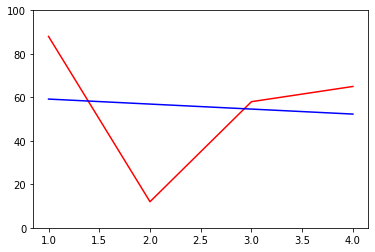

In [17]:
plt.plot(np.arange(1,5),y,'r-')
plt.plot(np.arange(1,5),yhat,'b-')
plt.ylim(0,100)
plt.show()